In [2]:
import QM as q
import numpy as np
import matplotlib.pyplot as plt

BIGGER_SIZE = 18
plt.rc('font', size=BIGGER_SIZE)
plt.rcParams['figure.figsize'] = [12,8]

In [3]:
def V(x, potential):
    ret = np.vectorize(potential)(x)
    return np.diag(ret)

def T(N, dx):
    ret = -2*np.diag(np.linspace(1,1,N), 0) + np.diag(np.linspace(1,1,N-1), 1) + np.diag(np.linspace(1,1,N-1), -1)
    ret = (-1/(2*dx**2))*ret
    return ret

def H(T, V):
    return q.operator(T + V)

# Double well potential

$$
V^0 = \frac{1}{2}m\omega^2x_0^2\left[\frac{x^2}{x^2_0} - 6\right]\frac{1}{24}
$$

With $x_0=\sqrt{\frac{\hbar}{m\omega}}$. In rescaled units ($\tilde{x}=x/x_0$, $\tilde{E}=E/\hbar\omega$ and $\tilde{V}(\tilde{x})=\frac{V(\tilde{x}x_0)}{\hbar\omega}$) it becomes (omitting the tilde)

$$
V^0(x) = \frac{1}{48}\left[x^2 - 6\right]^2
$$

## 1.1

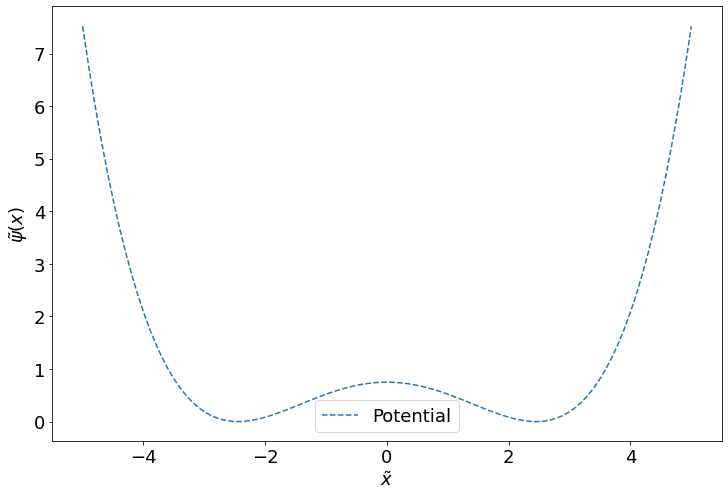

In [42]:
# Scale
L = 5
N = 100
xarr = np.linspace(-L, L, N)
dx = (2*L)/(N-1)

# Potential
double_well = lambda x:(1/48)*( (x**2 - 6)**2 )

# Plot potential
plt.plot(xarr, double_well(xarr), label='Potential', linestyle='dashed')


plt.xlabel('$\\tilde{x}$')
plt.ylabel('$\\tilde{\psi}(x)$')
plt.legend()
plt.savefig('double_well_potential.png', bbox_inches='tight')

## 1.2

Add perturbation

$$
V_A =
\left\{
\begin{array}{cc}
    - & \delta\ \ \ \text{for}\ \ \ x<0 \\
      & \delta\ \ \ \text{for}\ \ \ x>0
\end{array}
\right.
$$

With $V = V^0 + V_A$.


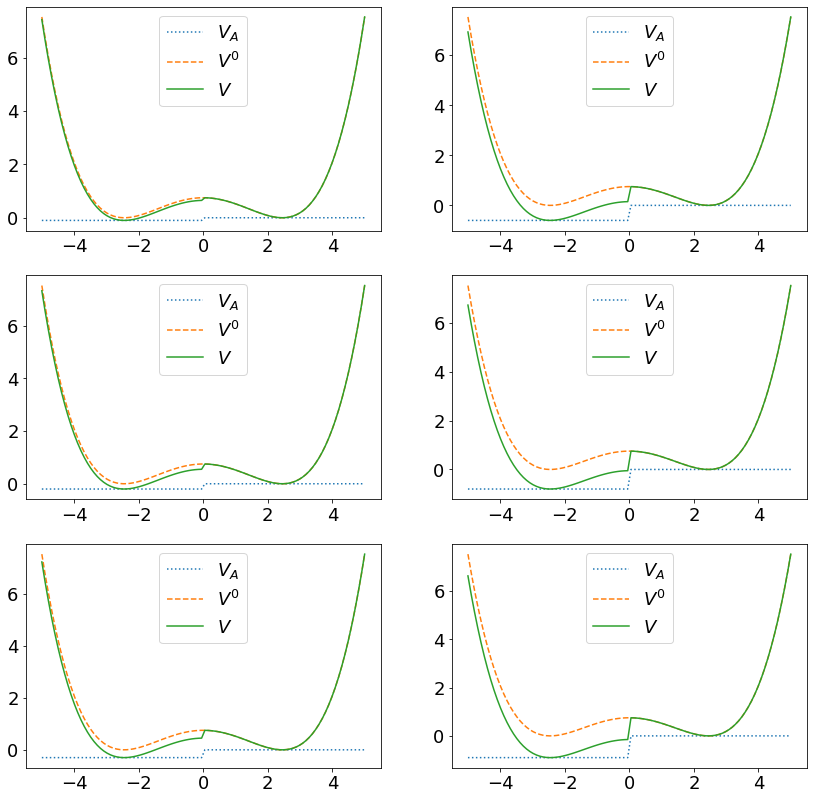

In [65]:
d = [0.1, 0.2, 0.3, 0.6, 0.8, 0.9]

fig, ax = plt.subplots(3,2, figsize=(14,14))

idx = 0

for i in range(2):
    for j in range(3):
        pert1 = lambda x: -d[idx]*(x<0) # Trick from https://stackoverflow.com/a/49847955
        ax[j,i].plot(xarr, pert1(xarr), label='$V_A$', linestyle='dotted')
        ax[j,i].plot(xarr, double_well(xarr), label='$V^0$', linestyle='dashed')
        ax[j,i].plot(xarr, pert1(xarr) + double_well(xarr), label='$V$', linestyle='solid')
        ax[j,i].legend()
        idx+=1

plt.legend()


In [ ]:
# LATER IN THE ASSIGNMENT

# Wavefunctions
H = q.operator(T(N,dx) + V(xarr, double_well))
l, U = H.eig()

# Plot wave functions
for i in range(5):
    plt.plot(xarr, U[:,i]+l[i], label='$\\tilde{\psi}_'+str(i)+'' + '+ \\tilde{E}_' + str(i) + '$')